# Predicting Individual Savings Potential: A Regression Model of Financial Behavior

## Introduction

### Project Overview
This project aims to analyze age, education, and financial data to predict individual savings potential. Understanding how these demographic and financial factors influence savings behavior is crucial for tailoring personalized financial products, optimizing marketing strategies, and ultimately enhancing business profitability.

### Background
The dataset used in this project consists of consumer financial data collected throughout 2022. It provides insights into several factors that may influence individual savings amounts, including age, education level, and financial literacy. By analyzing these variables, the project seeks to uncover patterns and relationships that drive personal savings behavior.

### Objectives
- **Segment Individuals:** Identify and categorize individuals based on their financial behavior to uncover distinct patterns and trends.
- **Analyze Key Factors:** Determine the most significant factors that impact personal savings.
- **Predict Savings Potential:** Develop a predictive model to estimate individual savings potential using the identified factors and relevant economic indicators.

### Data Description

#### Dataset Overview
The dataset for this project is sourced from the **Federal Reserve's Survey of Consumer Finances**. It consists of **22,975 individuals** and **5,473 features**, offering a comprehensive view of personal finances and economic behavior.

#### Key Features
Below are some of the key features used in this analysis:

- **Roth IRA balance (x6551):** The total balance in an individual’s Roth IRA account.
- **Savings account balance (x3730):** The amount of money held in an individual’s savings account.
- **Age of individual (x8022):** The age of the individual respondent.
- **Total education loan borrowed (x7805):** The total amount of student loans taken by an individual.
- **Education loan left (x7824):** The remaining balance on the student loan.
- **Highest level of educational attainment (x5931):** The highest level of education an individual has completed.
- **Current checking account balance (x3506):** The amount of money in an individual’s checking account.
- **Total brokerage account balance of family (x3930):** The total balance in the family’s brokerage accounts.
- **Amount received from Social Security (x5306):** The amount of Social Security benefits received.
- **Family annual income (x5702):** The total annual income of the family.
- **Typical year income (x7362):** The average annual income an individual typically earns.
- **Amount to charitable donations (x5823):** The total amount donated to charitable causes.
- **Years in college (x5933):** The number of years an individual has spent in higher education.

#### Data Types
- **Categorical:** `x5931` (Highest level of educational attainment)
- **Numerical:** All other listed features

### Prediction
The goal of this project is to develop a model that predicts each individual’s **savings potential** based on the provided features, such as age, education, income, and various financial account balances. By leveraging these key factors, the model aims to estimate how much an individual is likely to save, helping to better understand financial behavior and inform future financial decisions.

### Metric
**Mean Absolute Percentage Error (MAPE):** This metric calculates the average of the absolute differences between the predicted and actual values, expressed as a percentage of the actual values.

MAPE provides an intuitive way to assess the accuracy of predictions, as it expresses errors in relative terms, making it easier to interpret how far off predictions are from the true savings amounts.

### References
1. Dataset Source: [Federal Reserve's Survey of Consumer Finances](https://www.federalreserve.gov/econres/scfindex.htm)
2. Fernández-Villaverde, J., & Krueger, D. (2001). *Consumption and Saving over the Life Cycle: How Important are Consumer Durables?* University of Minnesota and Federal Reserve Bank of Minneapolis. [Link](https://www.sas.upenn.edu/~jesusfv/durableslc.pdf)
3. Fagereng, A., Holm, M. B., Moll, B., & Natvik, G. (2019). *Saving Behavior Across the Wealth Distribution: The Importance of Capital Gains.* National Bureau of Economic Research, Working Paper 26588. [Link](https://www.nber.org/system/files/working_papers/w26588/w26588.pdf)
4. Mahdzan, N., & Tabiani, S. (2013). *The Impact of Financial Literacy on Individual Saving: An Exploratory Study in the Malaysian Context*. Transformations in Business and Economics, 12, 41-55. [Link](https://www.researchgate.net/profile/Nurul-Mahdzan/publication/275056695_The_Impact_of_Financial_Literacy_on_Individual_Saving_An_Exploratory_Study_in_the_Malaysian_Context/links/553202fd0cf27acb0deaaff9/The-Impact-of-Financial-Literacy-on-Individual-Saving-An-Exploratory-Study-in-the-Malaysian-Context.pdf)

---

## Exploratory Data Analysis

In [1]:
# import basic packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

### Understanding the Dataset

In [2]:
data = pd.read_stata('p22i6.dta')

In [3]:
data.head()

j7398  j7578  j7579  j7019  j7020  j7001  j7050  j8020  j8021  j5908  \
0      0      0      0      8      8      8      0      0      0      0   
1      0      0      0      8      8      8      0      0      0      0   
2      0      0      0      8      8      8      0      0      0      0   
3      0      0      0      8      8      8      0      0      0      0   
4      0      0      0      8      8      8      0      0      0      0   

   j7005  j8022  j8023  j8024  j7000  j7021  j7002  j102  j103  j104  j105  \
0      0      0      0      8      1      1      0     1     1     1     1   
1      0      0      0      8      1      1      0     1     1     1     1   
2      0      0      0      8      1      1      0     1     1     1     1   
3      0      0      0      8      1      1      0     1     1     1     1   
4      0      0      0      8      1      1      0     1     1     1     1   

   j106  j107  j108  j110  j7006  j111  j112  j113  j114  j116  j7007  j117  \
0     1     1     0     0      0     0     0     0     5     0      0     0   
1     1     1     0     0      0     0     0     0     5     0      0     0   
2     1     1     0     0      0     0     0     0     5     0      0     0   
3     1     1     0     0      0     0     0     0     5     0      0     0   
4     1     1     0     0      0     0     0     0     5     0      0     0   

   j118  j119  j120  j122  j7008  j123  j124  j125  j126  j128  j7009  j129  \
0     0     0     0     0      0     1     1     0     0     0      0     1   
1     0     0     0     0      0     1     1     0     0     0      0     1   
2     0     0     0     0      0     1     1     0     0     0      0     1   
3     0     0     0     0      0     1     1     0     0     0      0     1   
4     0     0     0     0      0     1     1     0     0     0      0     1   

   j130  j131  j132  j134  j7010  j135  j136  j137  j202  j204  j7011  j205  \
0     1     0     1     1      1     1     1     1     1     1      1     1   
1     1     0     1     1      1     1     1     1     1     1      1     1   
2     1     0     1     1      1     1     1     1     1     1      1     1   
3     1     0     1     1      1     1     1     1     1     1      1     1   
4     1     0     1     1      1     1     1     1     1     1      1     1   

   j206  j207  j208  j210  j7012  j211  j212  j213  j214  j216  j7013  j217  \
0     1     1     1     1      1     1     1     1     1     1      1     1   
1     1     1     1     1      1     1     1     1     1     1      1     1   
2     1     1     1     1      1     1     1     1     1     1      1     1   
3     1     1     1     1      1     1     1     1     1     1      1     1   
4     1     1     1     1      1     1     1     1     1     1      1     1   

   j218  j219  j220  j222  j7014  j223  j224  j225  j226  j228  j7035  j229  \
0     1     1     1     1      1     1     1     1     1     1      1     1   
1     1     1     1     1      1     1     1     1     1     1      1     1   
2     1     1     1     1      1     1     1     1     1     1      1     1   
3     1     1     1     1      1     1     1     1     1     1      1     1   
4     1     1     1     1      1     1     1     1     1     1      1     1   

   j230  j231  j19000  j19001  j19002  j19003  j19004  j19005  j19006  j19007  \
0     1     1       0       1       1       1       1       1       1       1   
1     1     1       0       1       1       1       1       1       1       1   
2     1     1       0       1       1       1       1       1       1       1   
3     1     1       0       1       1       1       1       1       1       1   
4     1     1       0       1       1       1       1       1       1       1   

   j19008  j19009  j19010  j19011  j19012  j19013  j19014  j19015  j19016  \
0       1       1       1       1       1       1       1       1       1   
1       1       1       1       1       1       1       1       1  

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22975 entries, 0 to 22974
Columns: 5473 entries, j7398 to x11572
dtypes: float32(245), float64(103), int16(2620), int32(368), int8(2137)
memory usage: 233.4 MB


### Data Cleaning

In [5]:
# any duplicates?

data = data.drop_duplicates()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22975 entries, 0 to 22974
Columns: 5473 entries, j7398 to x11572
dtypes: float32(245), float64(103), int16(2620), int32(368), int8(2137)
memory usage: 233.4 MB


### Feature Engineering

In [7]:
# select features

data = data[['x6551', 'x3730', 'x8022', 'x7805', 'x7824', 'x5931', 'x3506', 'x3930', 'x5306', 'x5702', 'x7362', 'x5823', 'x5933']]

In [8]:
data.head()

,x6551,x3730,x8022,x7805,x7824,x5931,x3506,x3930,x5306,x5702,x7362,x5823,x5933
0,0,6400,70,0,0,9,6700,0,34000,0,0,0,3
1,0,3100,70,0,0,9,4200,0,34000,0,0,0,3
2,0,2000,70,0,0,9,3200,0,33000,0,0,0,3
3,0,49000,70,0,0,9,2600,0,33000,0,0,0,3
4,0,5800,70,0,0,9,1800,0,33000,0,0,0,3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22975 entries, 0 to 22974
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x6551   22975 non-null  int32
 1   x3730   22975 non-null  int32
 2   x8022   22975 non-null  int8 
 3   x7805   22975 non-null  int32
 4   x7824   22975 non-null  int32
 5   x5931   22975 non-null  int8 
 6   x3506   22975 non-null  int32
 7   x3930   22975 non-null  int32
 8   x5306   22975 non-null  int32
 9   x5702   22975 non-null  int32
 10  x7362   22975 non-null  int32
 11  x5823   22975 non-null  int32
 12  x5933   22975 non-null  int8 
dtypes: int32(10), int8(3)
memory usage: 964.9 KB


In [10]:
data.describe()

,x6551,x3730,x8022,x7805,x7824,x5931,x3506,x3930,x5306,x5702,x7362,x5823,x5933
count,2.297500e+04,2.297500e+04,22975.000000,22975.000000,22975.000000,22975.000000,2.297500e+04,2.297500e+04,22975.000000,2.297500e+04,2.297500e+04,2.297500e+04,22975.000000
mean,1.208784e+05,3.313193e+05,54.468988,8542.488357,6911.901632,10.328400,9.072182e+04,1.535448e+05,1739.407182,1.633610e+05,3.837768e+05,1.774314e+05,0.334755
std,2.672563e+06,5.941817e+06,16.189081,30657.411680,26990.540907,2.815743,1.014954e+06,2.509599e+06,6344.988458,8.379227e+05,4.235035e+06,2.919966e+06,0.962842
min,-1.000000e+00,-1.000000e+00,18.000000,0.000000,0.000000,-1.000000,-3.000000e+02,-1.000000e+00,0.000000,-1.000000e+00,-9.000000e+00,0.000000e+00,0.000000
25%,0.000000e+00,0.000000e+00,42.000000,0.000000,0.000000,8.000000,7.000000e+02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,0.000000e+00,2.000000e+02,56.000000,0.000000,0.000000,11.000000,3.500000e+03,0.000000e+00,0.000000,4.200000e+04,0.000000e+00,0.000000e+00,0.000000
75%,0.000000e+00,1.800000e+04,67.000000,0.000000,0.000000,12.000000,1.600000e+04,0.000000e+00,980.000000,1.190000e+05,4.000000e+04,3.300000e+03,0.000000
max,1.626700e+08,2.600000e+08,95.000000,474000.000000,458000.000000,14.000000,4.553000e+07,1.000000e+08,55000.000000,2.788000e+07,1.712300e+08,1.331500e+08,5.000000


### Data Visualization

In [11]:
# remove non positive values for x8022, x5931

data = data[data['x8022'] > 0]
data = data[data['x5931'] > 0]

In [12]:
# add x6551 and x3730 for encompassing

data['total saved'] = data['x6551'] + data['x3730']

# remove x6551 and x3730

data = data.drop(['x6551', 'x3730'], axis=1)

In [13]:
data

,x8022,x7805,x7824,x5931,x3506,x3930,x5306,x5702,x7362,x5823,x5933,total saved
0,70,0,0,9,6700,0,34000,0,0,0,3,6400
1,70,0,0,9,4200,0,34000,0,0,0,3,3100
2,70,0,0,9,3200,0,33000,0,0,0,3,2000
3,70,0,0,9,2600,0,33000,0,0,0,3,49000
4,70,0,0,9,1800,0,33000,0,0,0,3,5800
...,...,...,...,...,...,...,...,...,...,...,...,...
22970,40,0,0,8,0,0,0,0,0,0,0,0
22971,40,0,0,8,0,0,0,0,0,0,0,0
22972,40,0,0,8,0,0,0,0,0,0,0,0
22973,40,0,0,8,0,0,0,0,0,0,0,0


/home/hpark/Syncthing/Professional/DS_Projects/Predict_Individual_Savings/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



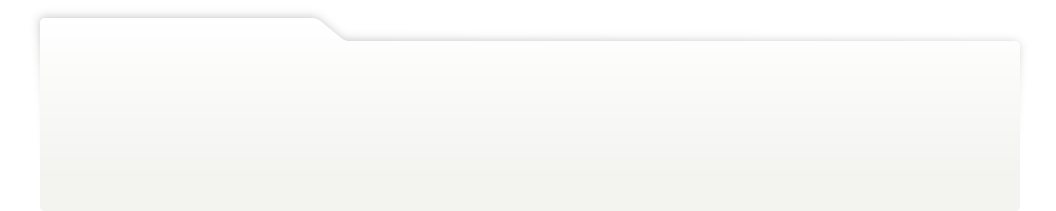
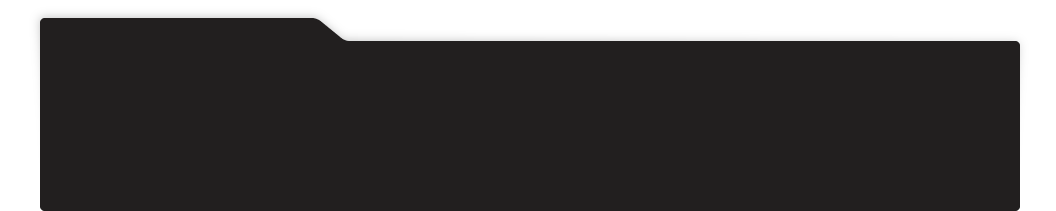
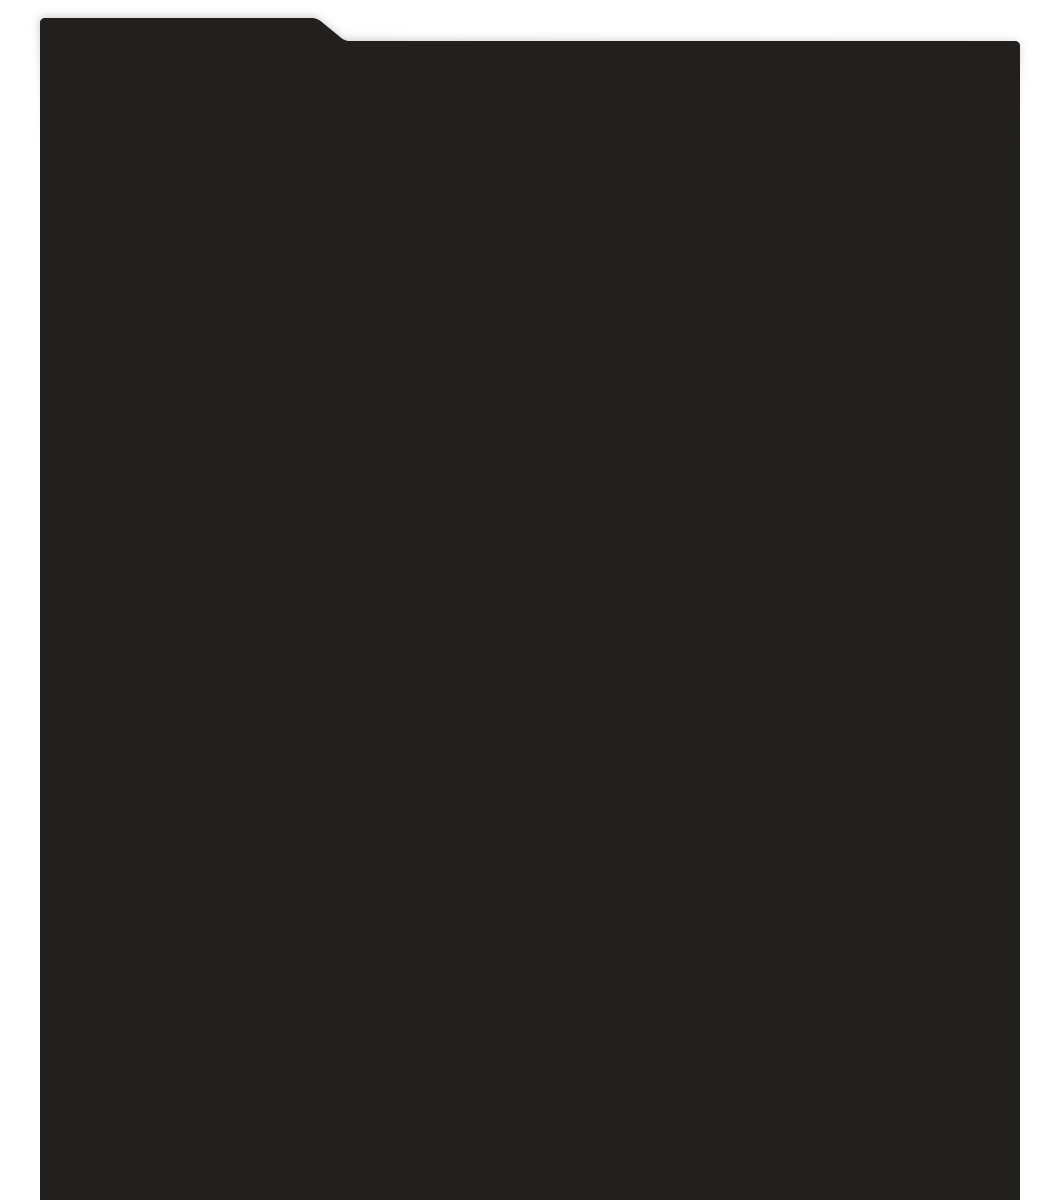
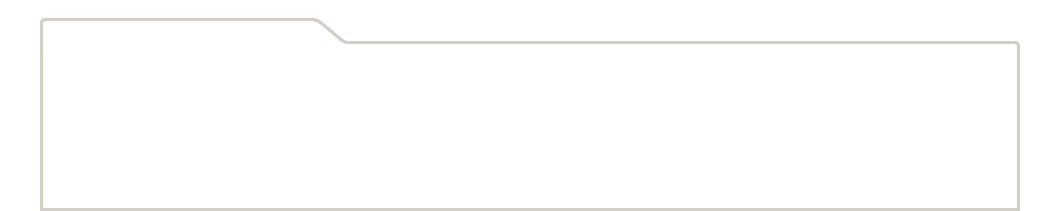
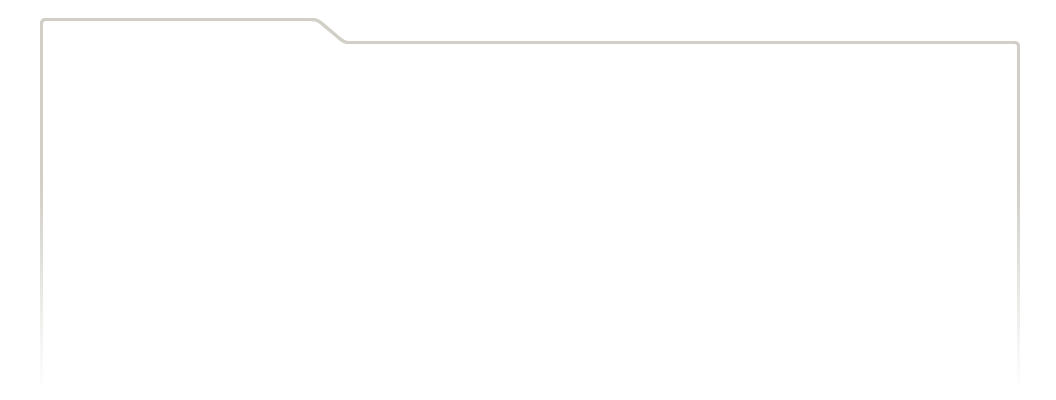
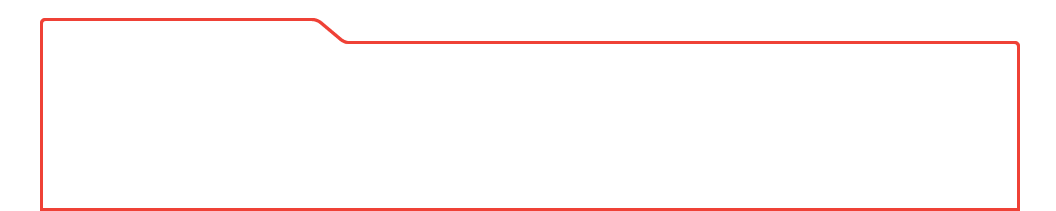
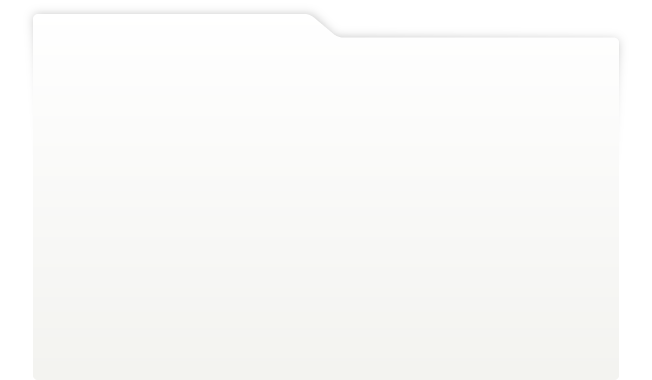
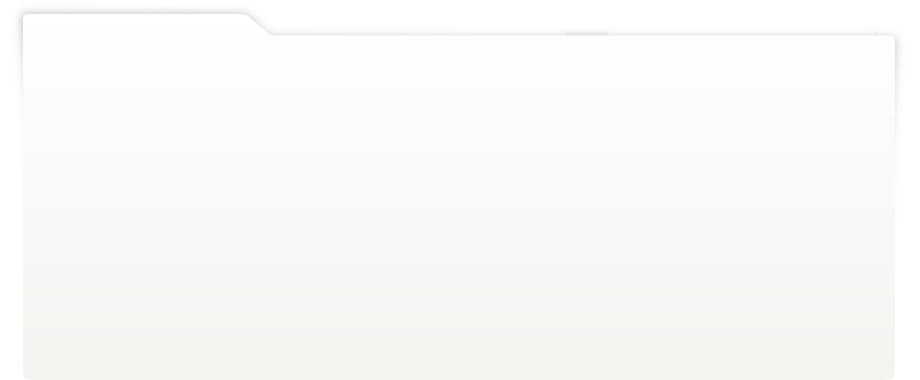
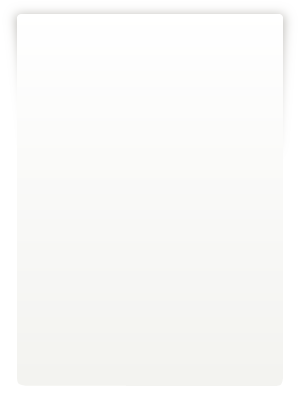
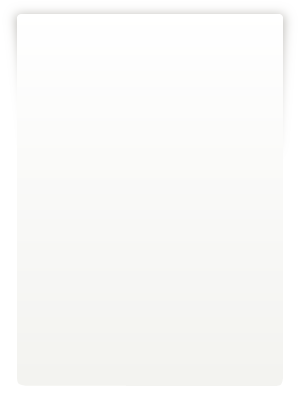
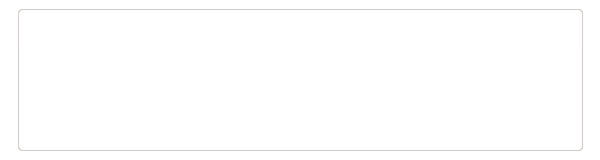
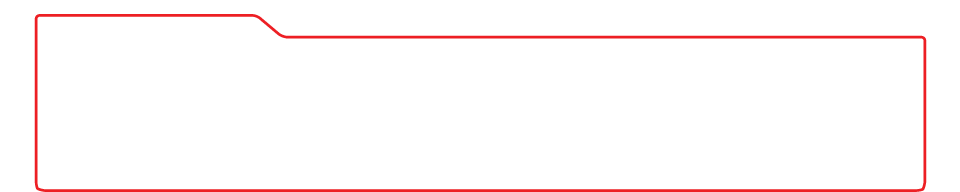
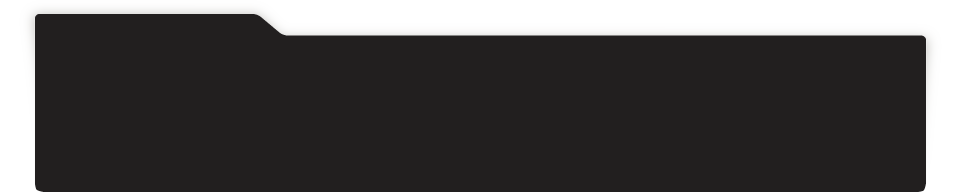
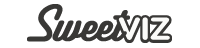
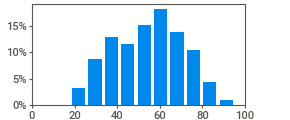
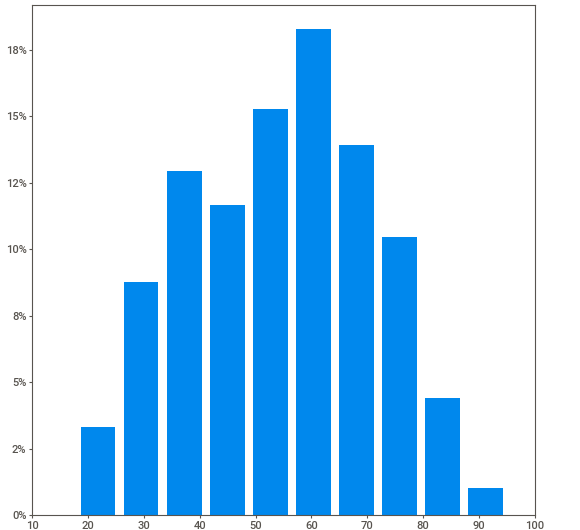
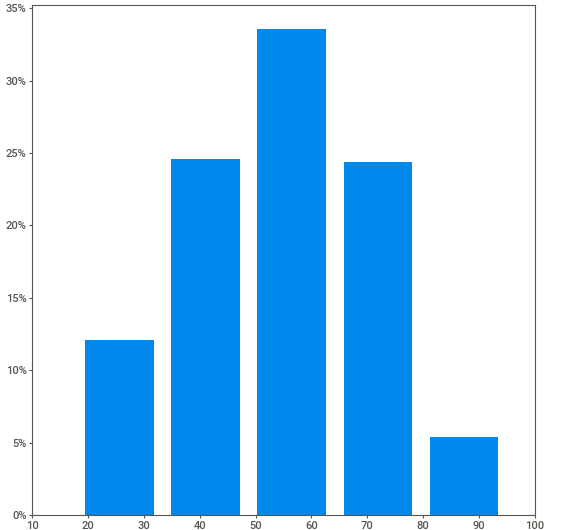
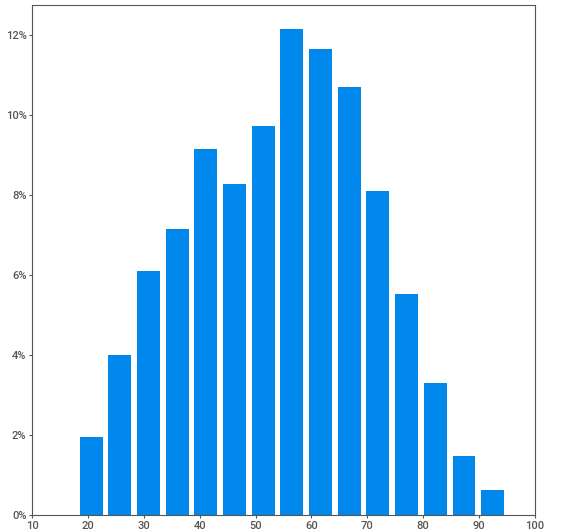
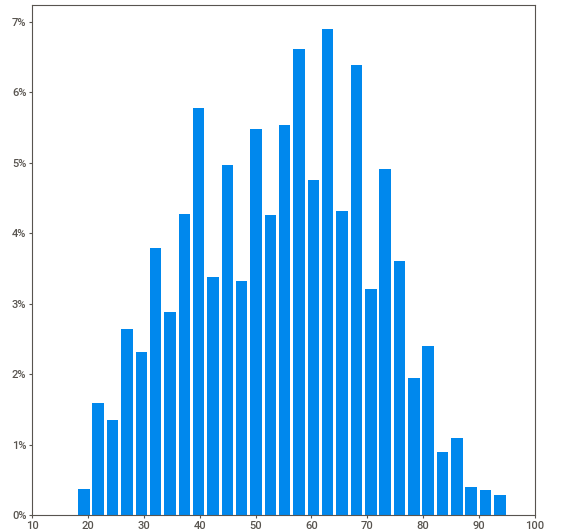
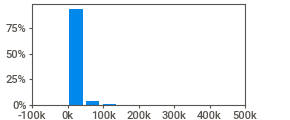
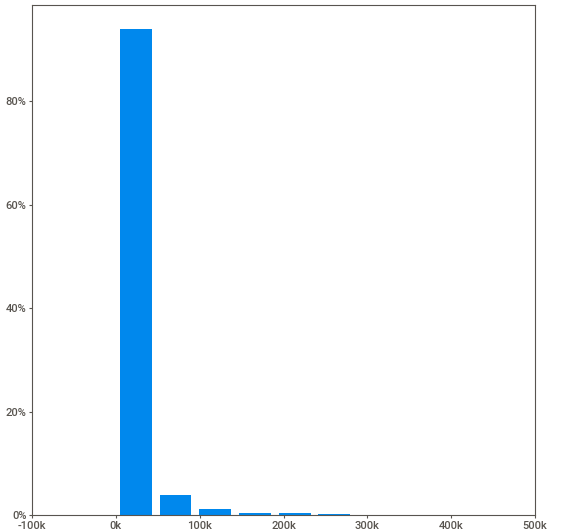
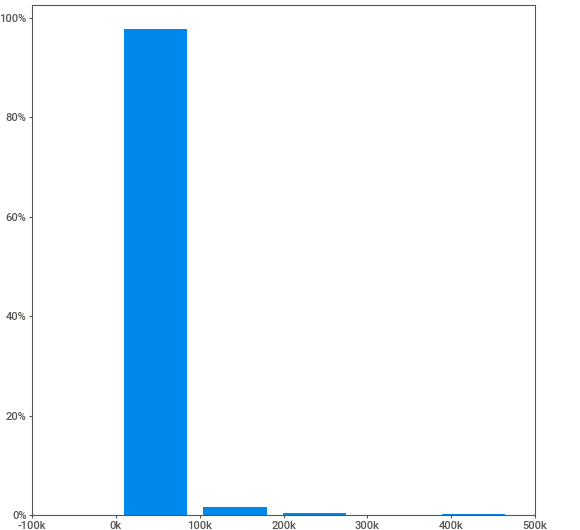
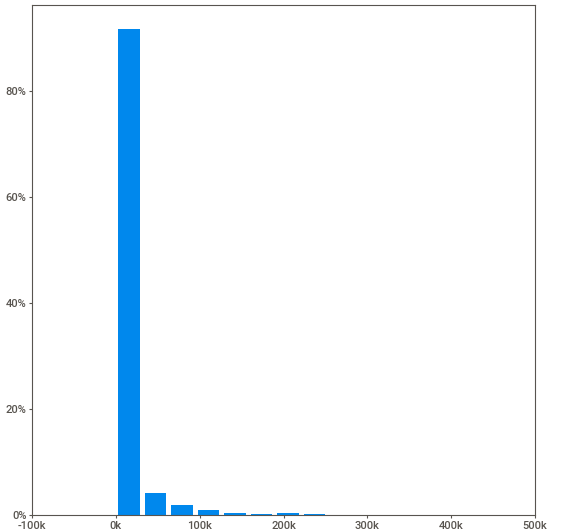
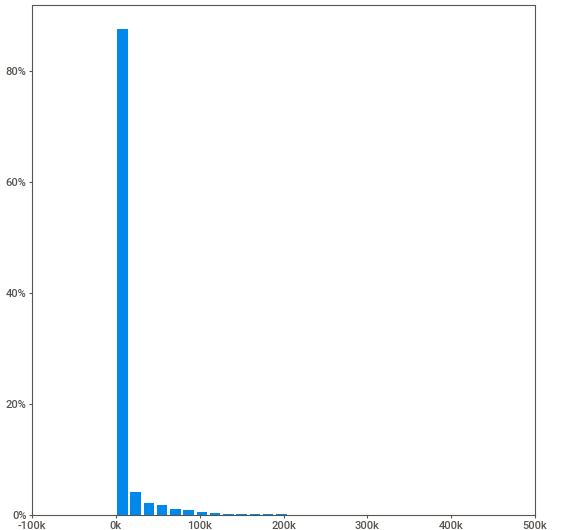
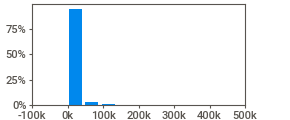
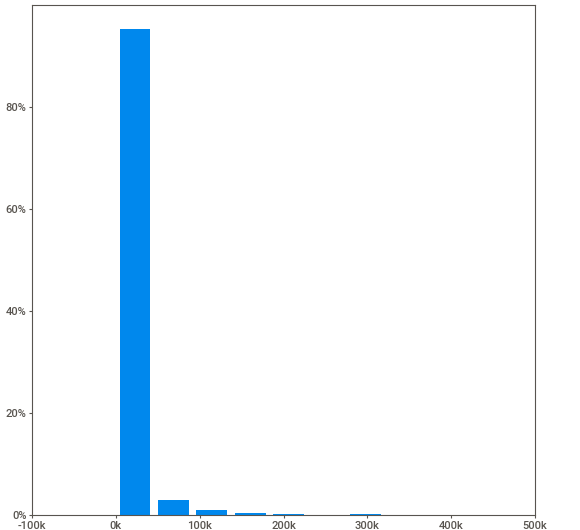
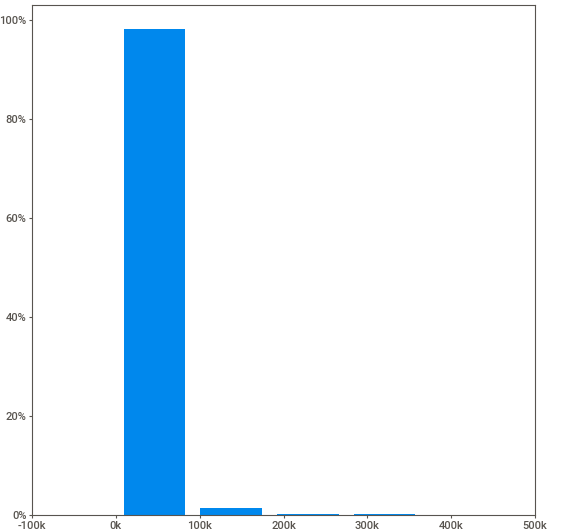
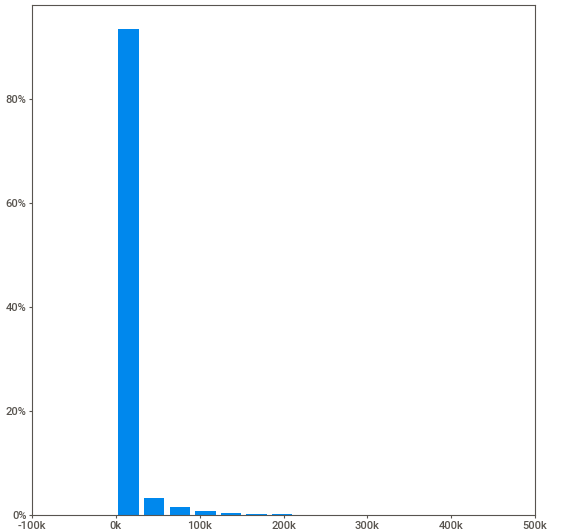
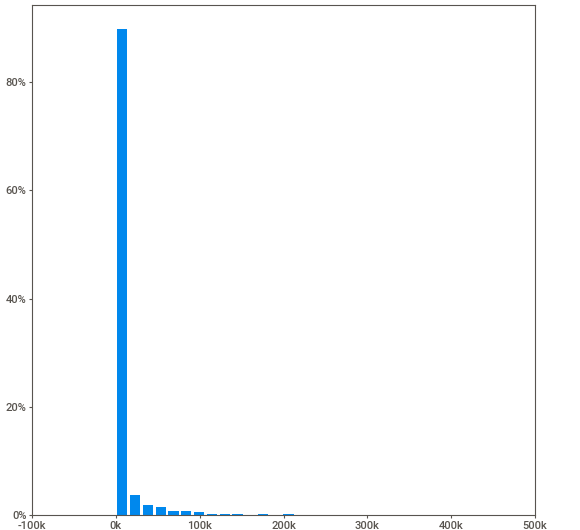
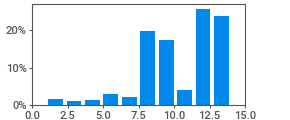
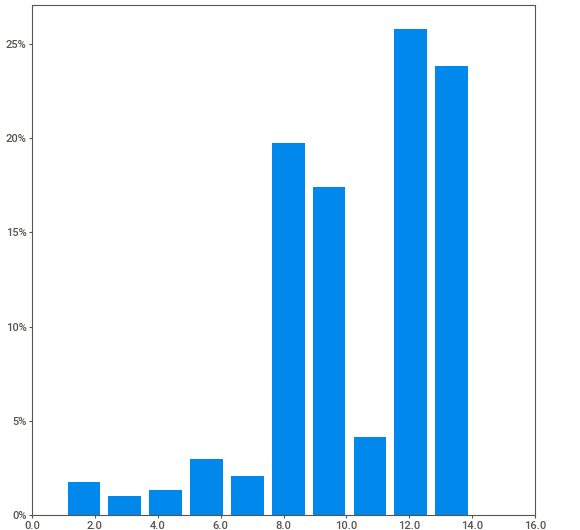
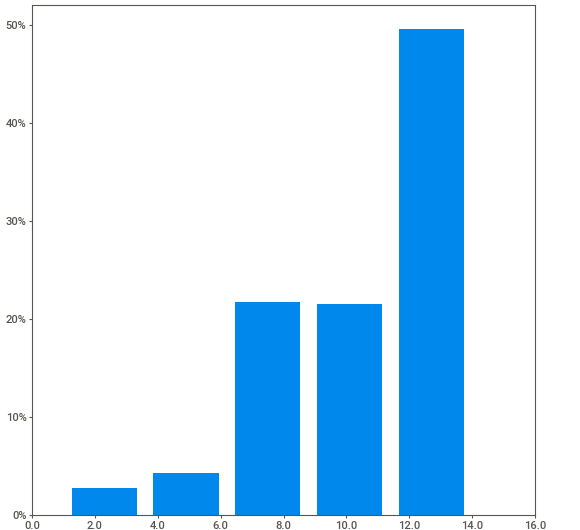
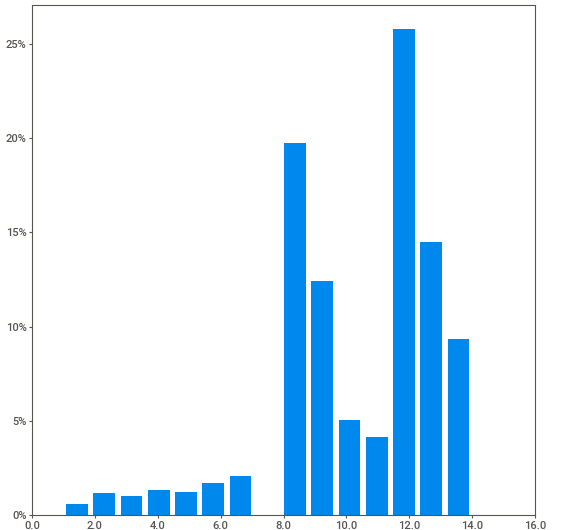
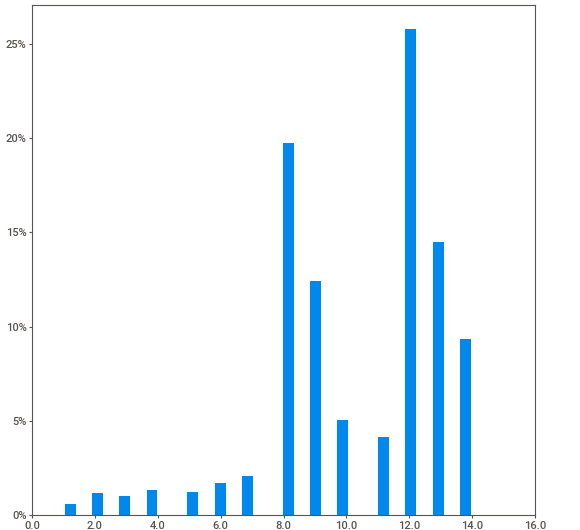
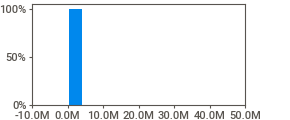
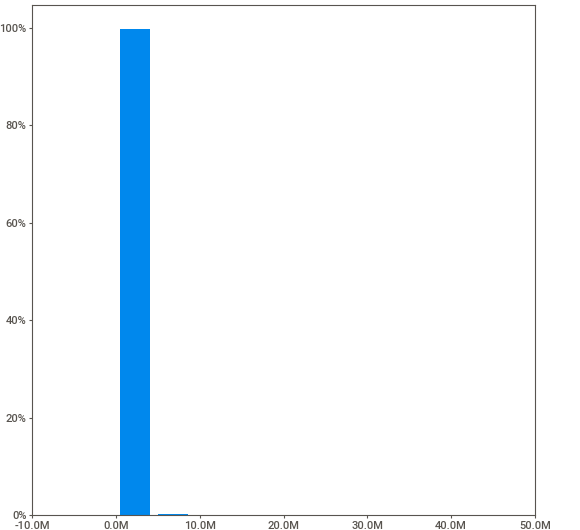
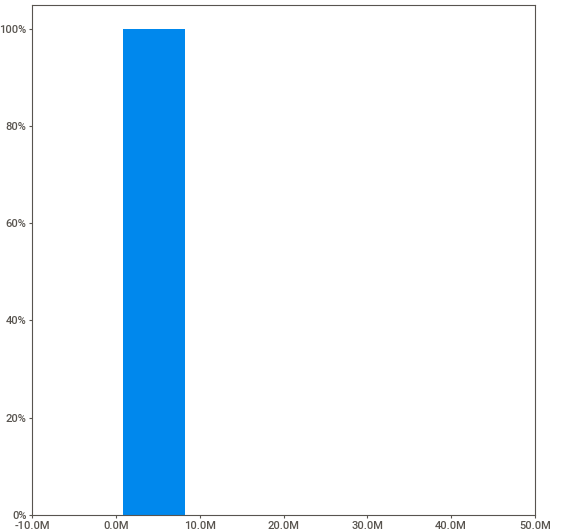
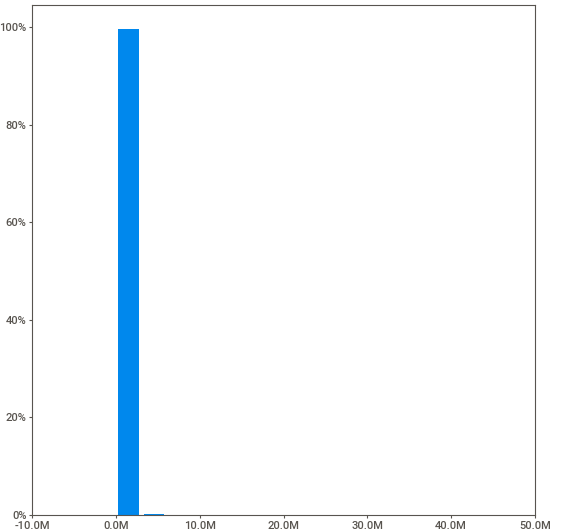
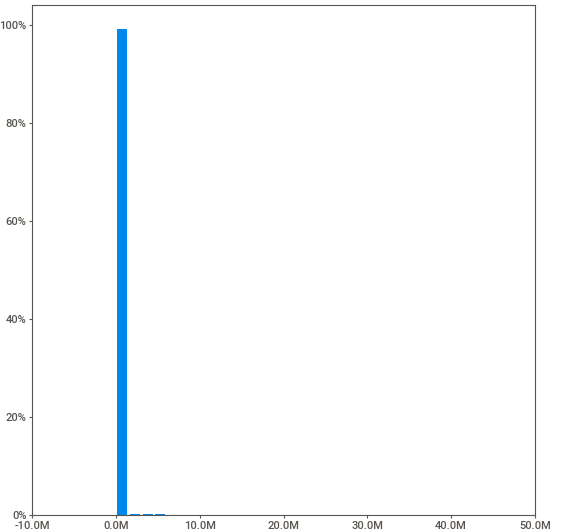
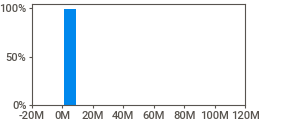
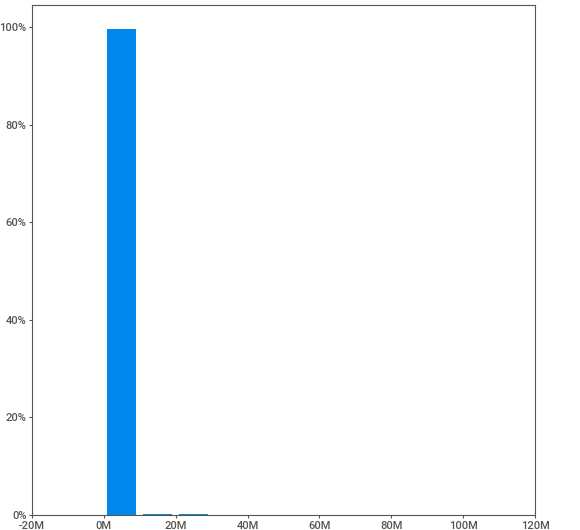
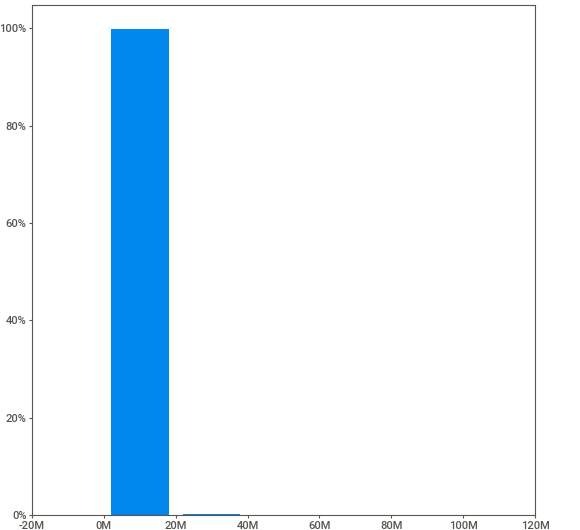
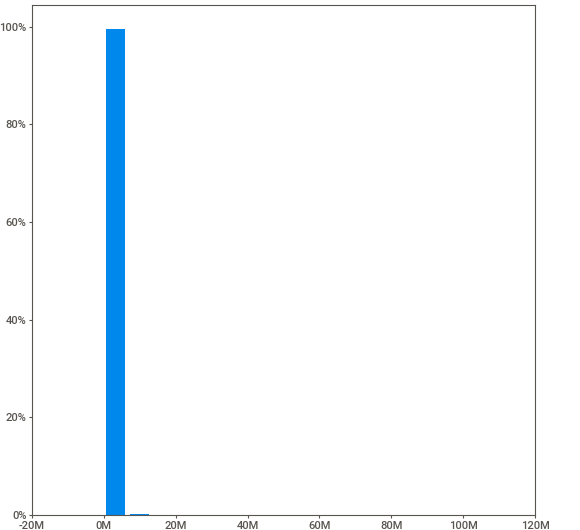
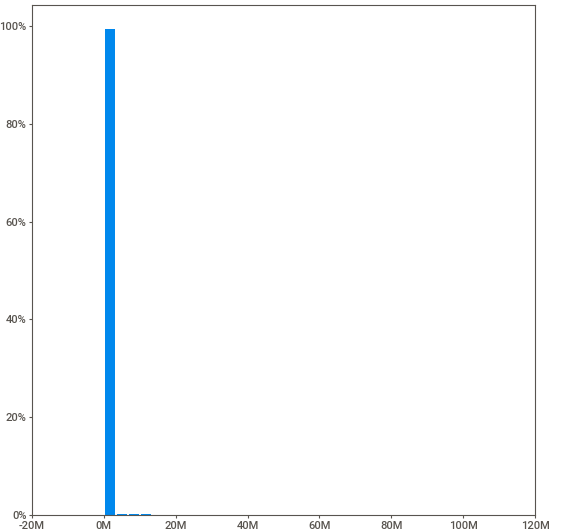
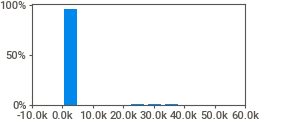
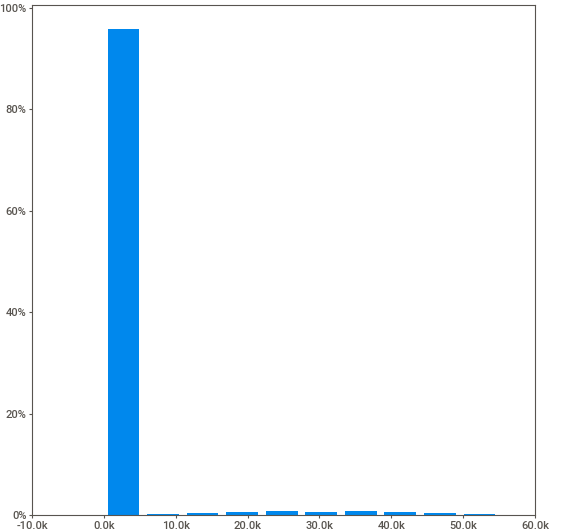
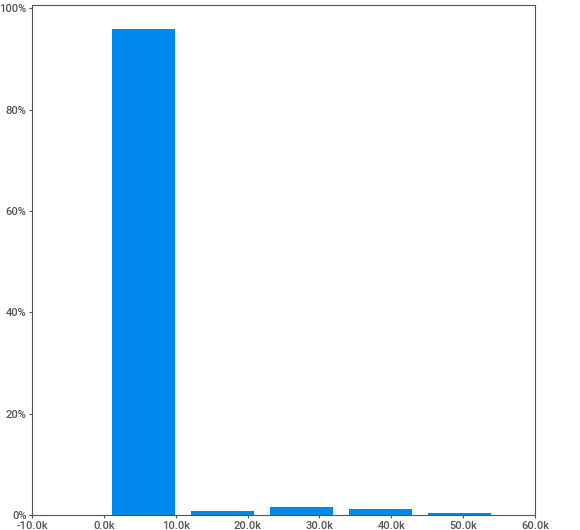
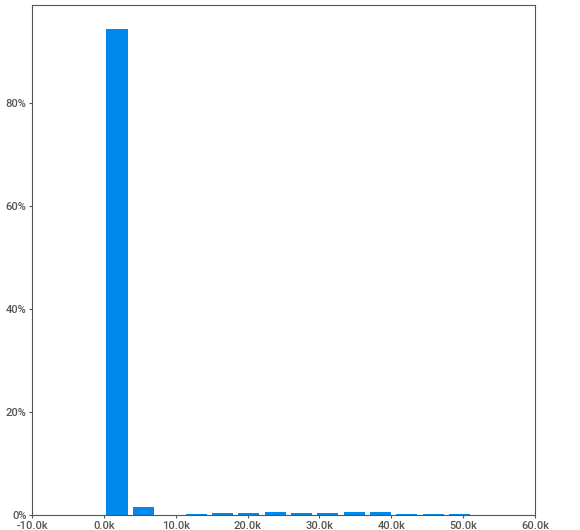
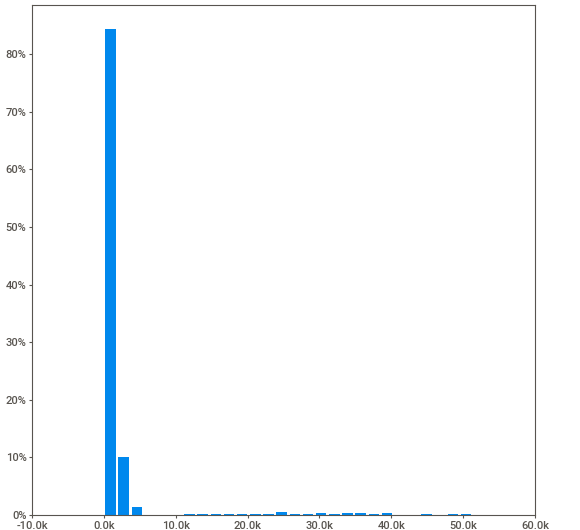
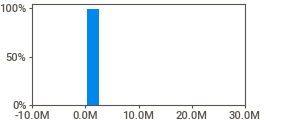
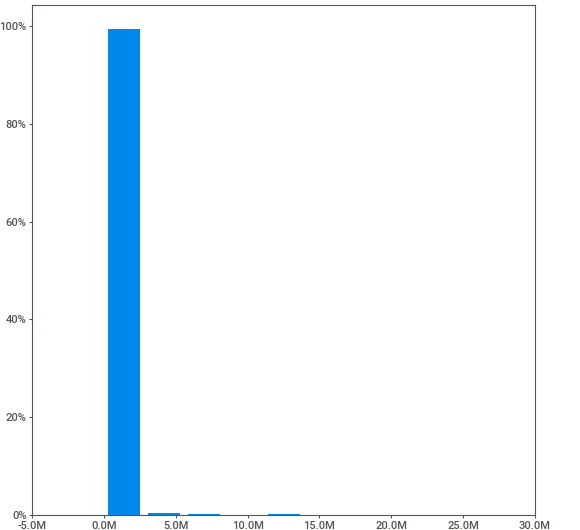
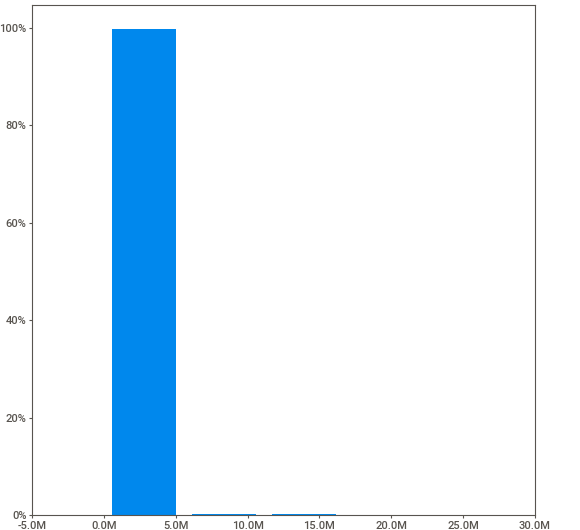
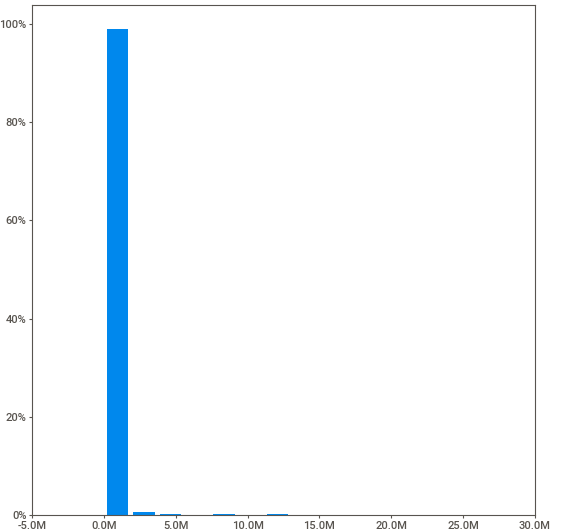
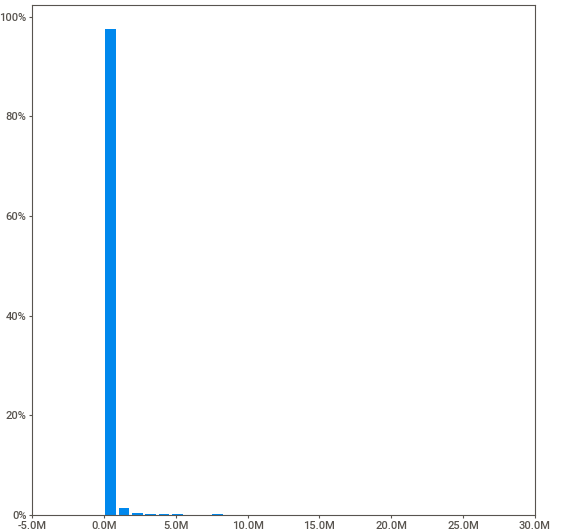
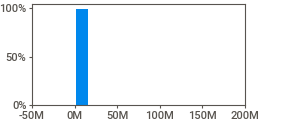
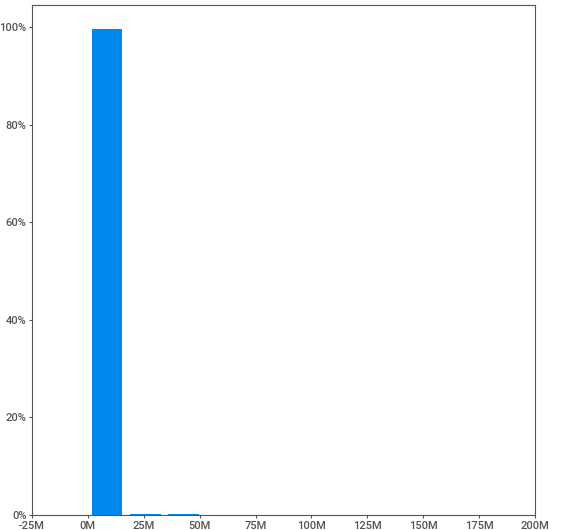
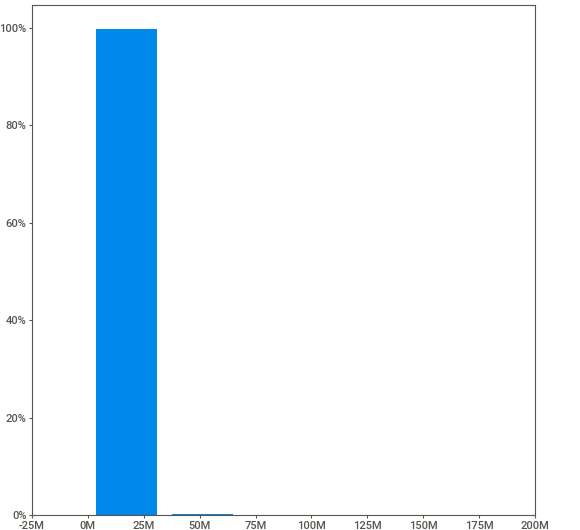
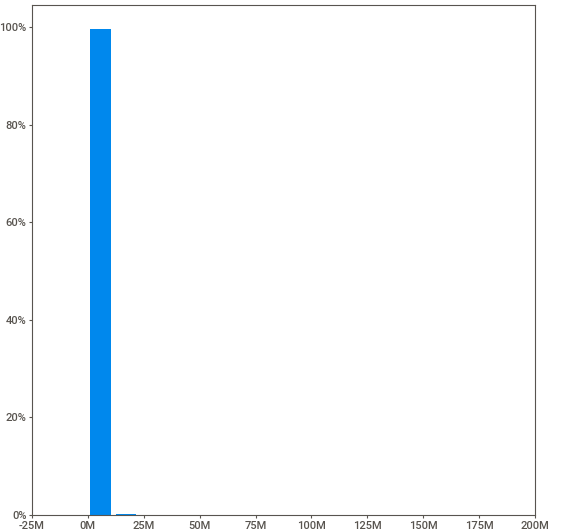
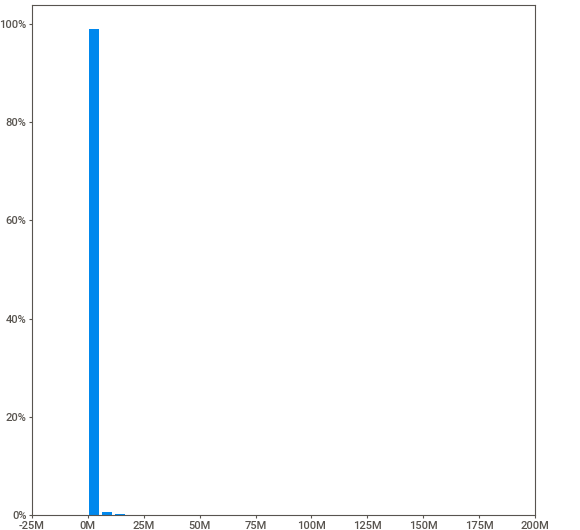
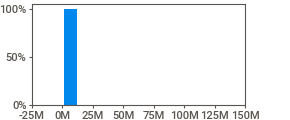
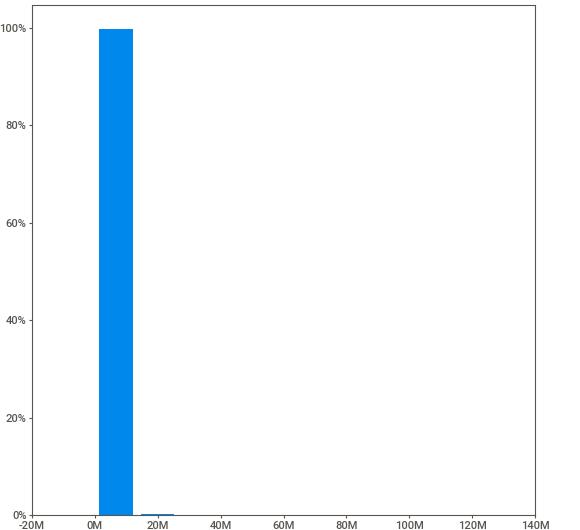
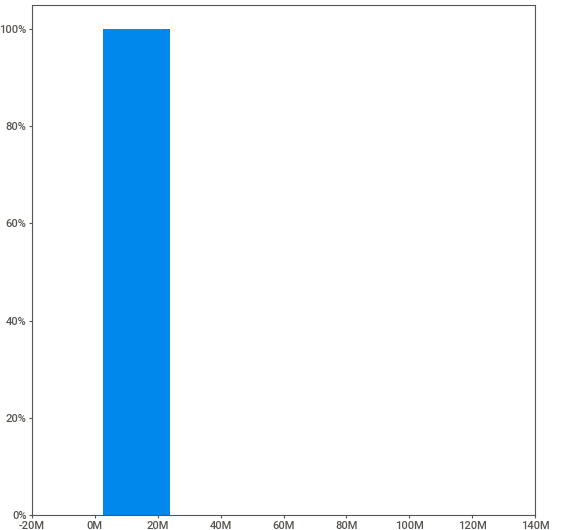
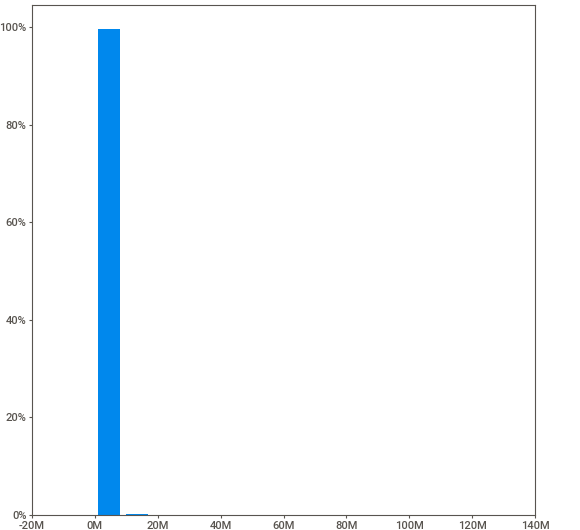
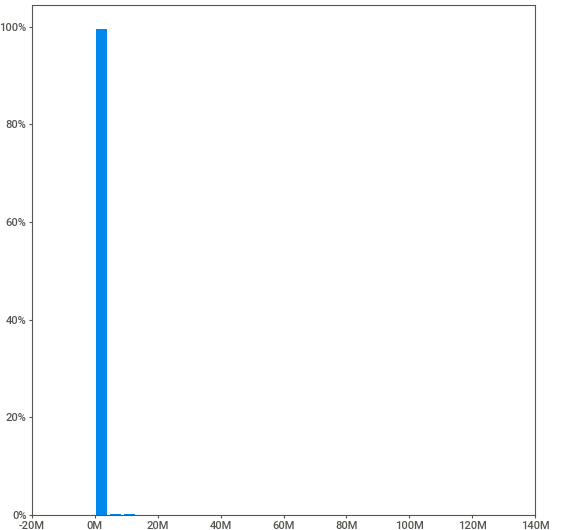
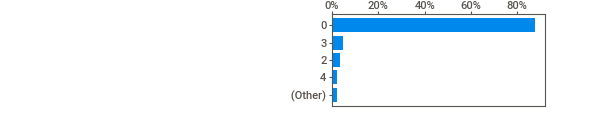
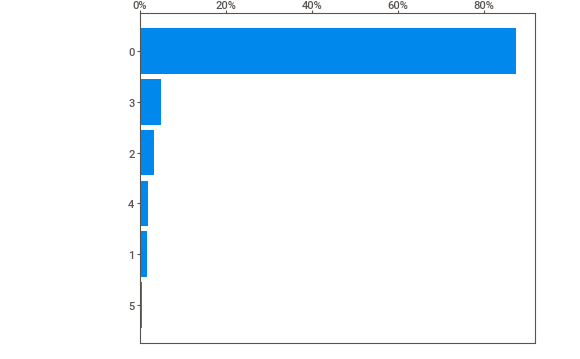
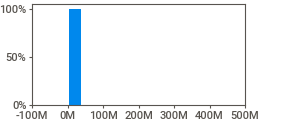
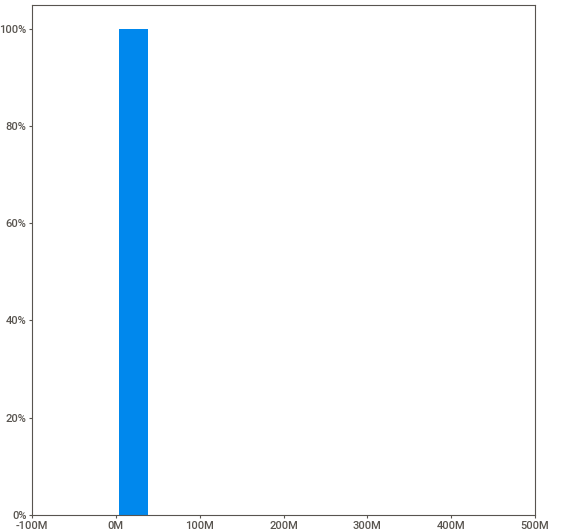
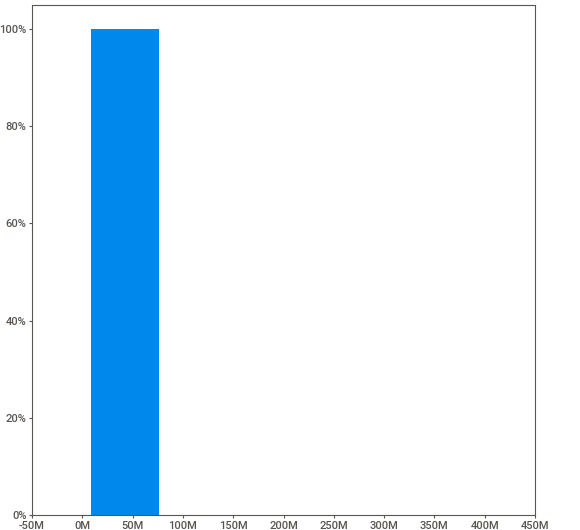
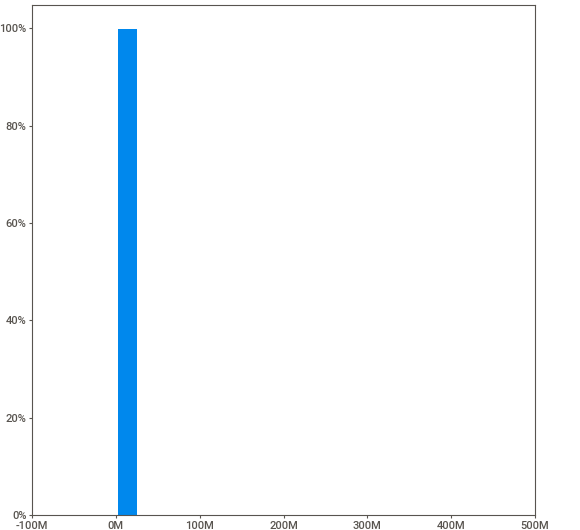
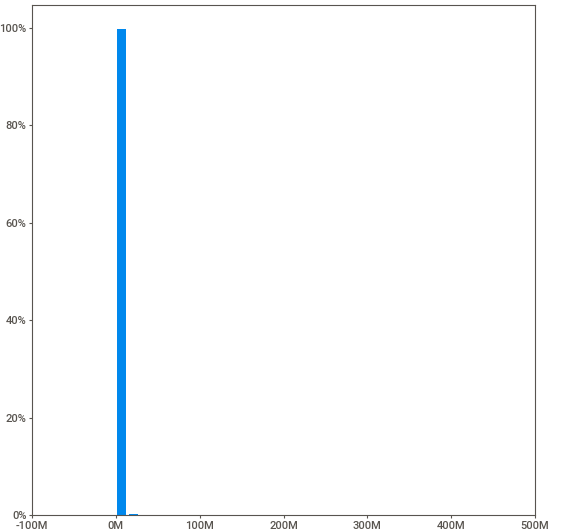
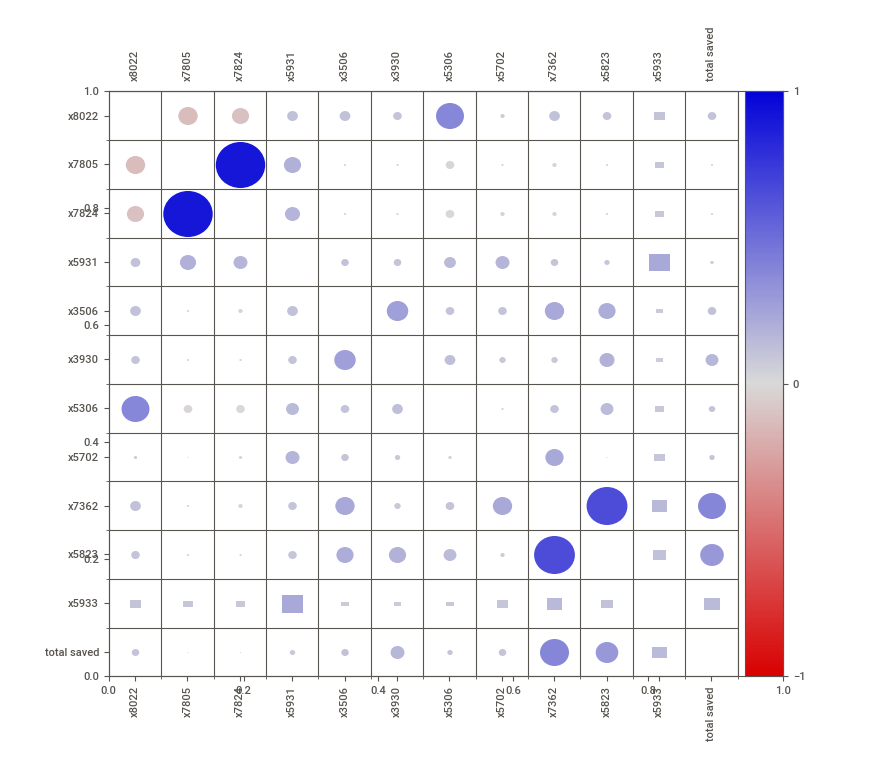
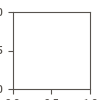

In [14]:
import sweetviz as sv

# Create a Sweetviz report
report = sv.analyze(data)

# Display the report in a Jupyter notebook
report.show_notebook()

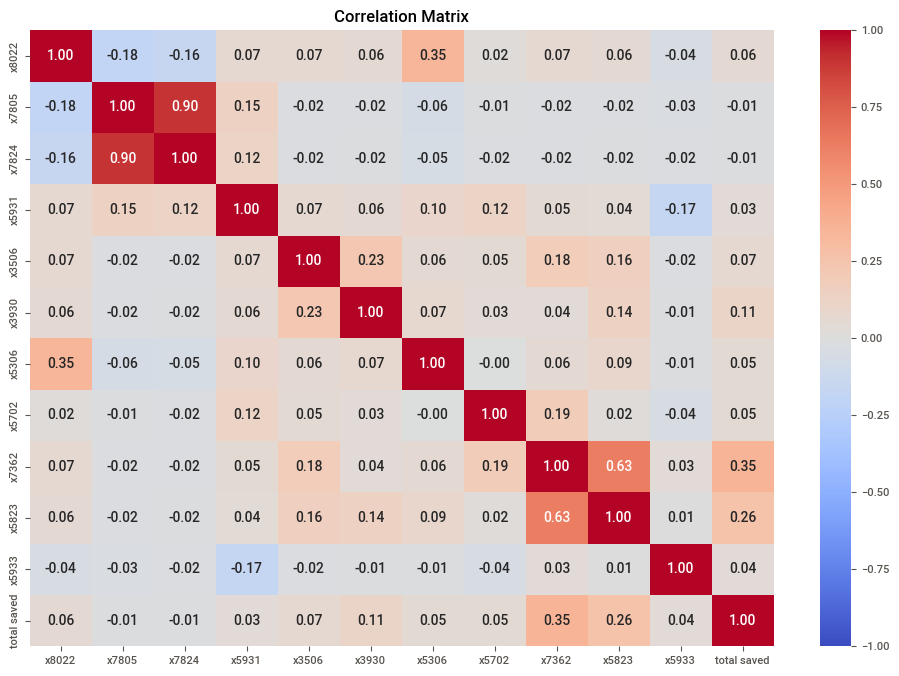

In [15]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [16]:
numerical_columns = data.select_dtypes(include=[np.number]).columns

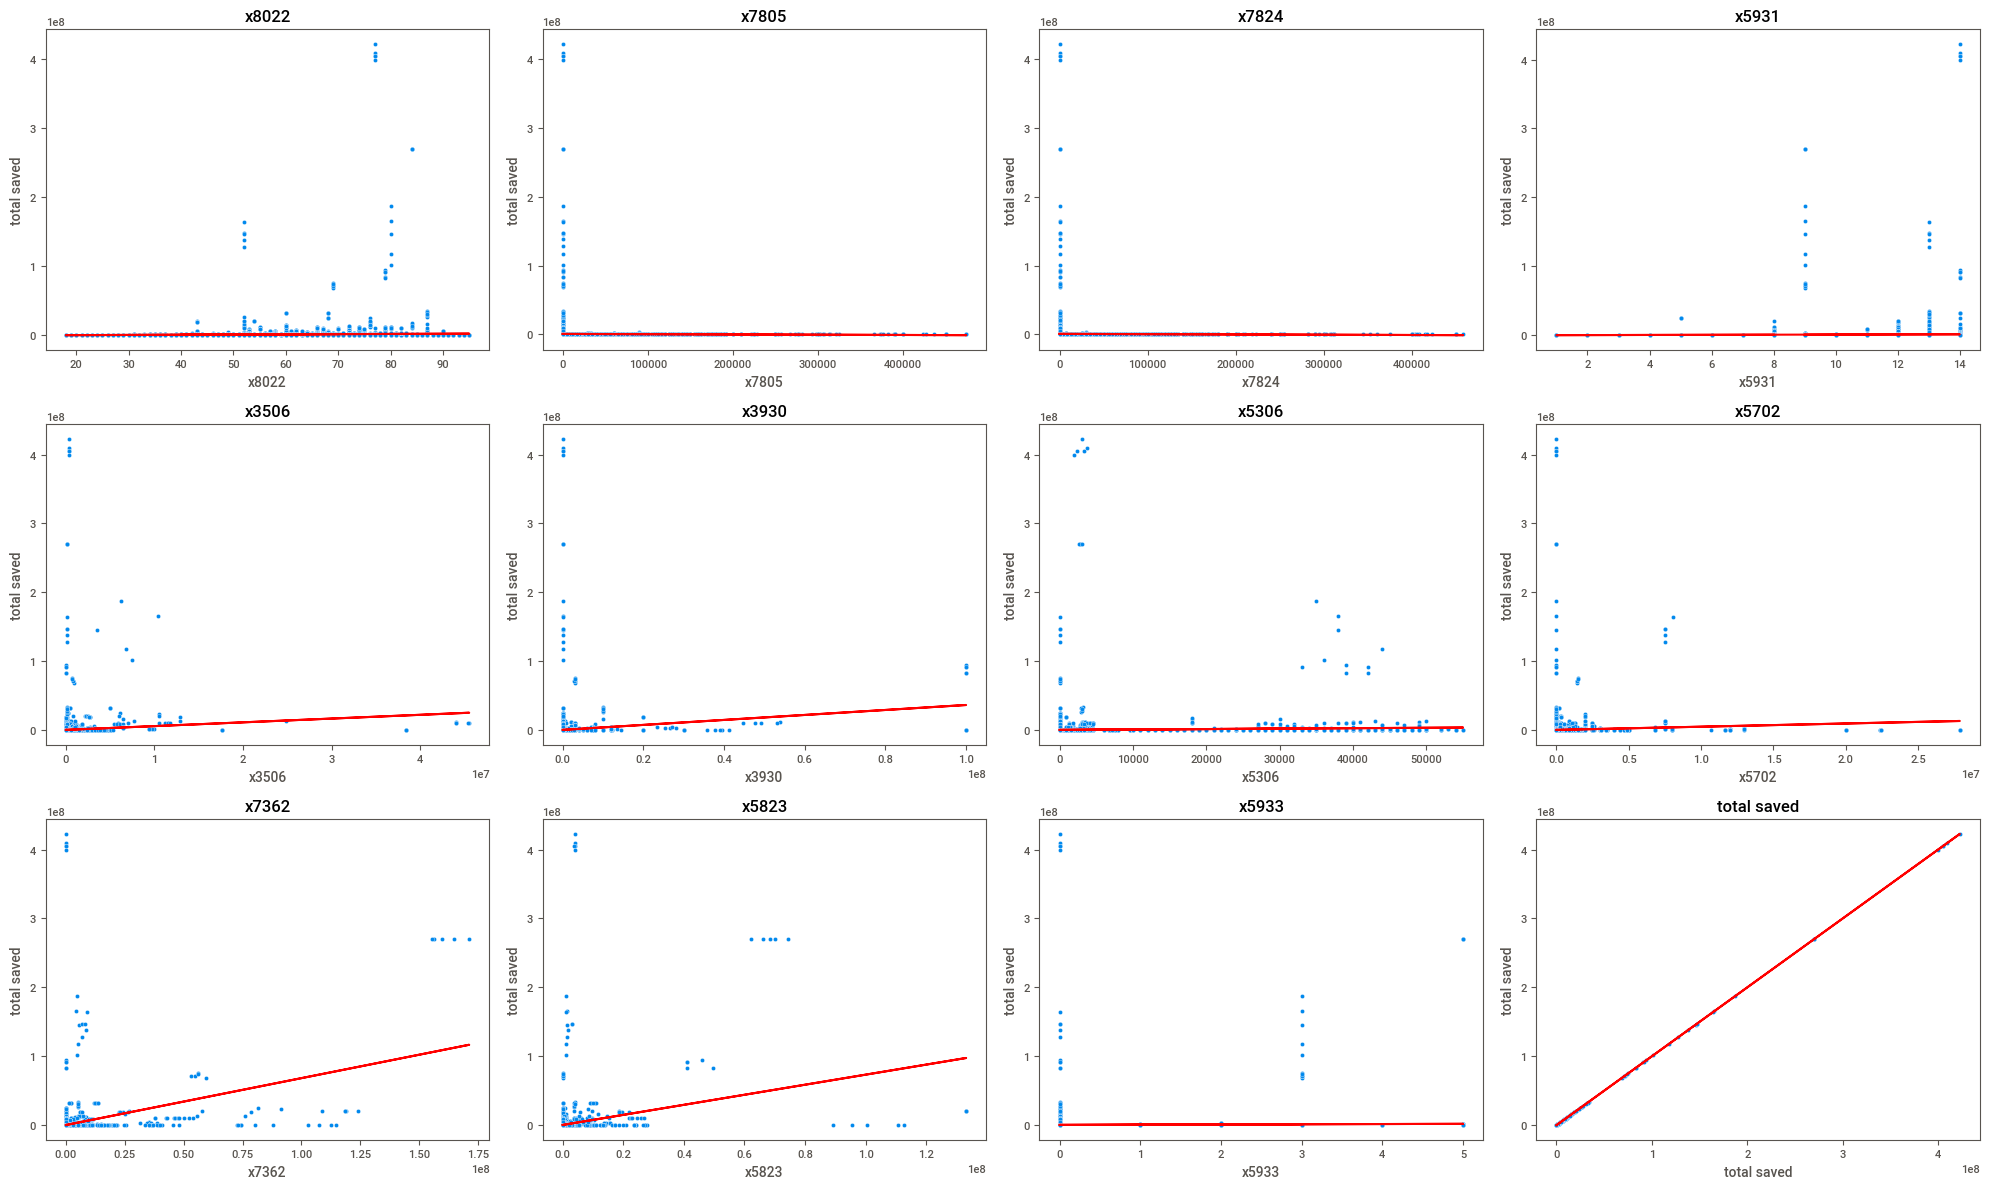

In [17]:
# plot of total saved vs all other variables

# Determine the number of rows and columns for subplots
num_plots = len(numerical_columns)
cols = 4  # Number of columns in the grid
rows = np.ceil(num_plots / cols).astype(int)  # Number of rows in the grid

# Create a figure with a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Loop through the columns and plot each one
for i, column in enumerate(numerical_columns):
    sns.scatterplot(x=column, y='total saved', data=data, ax=axes[i])
    # regression line
    m, b = np.polyfit(data[column], data['total saved'], 1)
    axes[i].plot(data[column], m*data[column] + b, color='red')
    axes[i].set_title(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Display the plots
plt.tight_layout()
plt.show()

### Cluster Analysis